Question 1:

The first step is to drop unwanted data. This is important because is helps make an accurate analysis. If the data is not needed it should not be included.

The second step is to check for missing data. This is important because it could cause the analysis to be inaccurate.

The third step is to address missing data. This is important because we need to know how to deal with missing data so our analysis is correct. Leaving the data missing can cause an inaccurate analysis.

The fourth step is to remove duplicates. This is important because we do not want to have multiple instances of the same data. This can cause the data to be biased.

The fifth step is to fix structural errors. This is important because it helps ensure that the data is consistent and ready to be used for analysis.

The sixth step is check valid inputs for categorical features. This feature has limited amount of values, meaning that if the values go over that limit it could cause errors and the data could be incorrect.

The seventh step is to identify numerical outliers. This is important because it helps see the max and min outliers in the data to help give a valid analysis.

In [3]:
#Question2

import pandas as pd
df = pd.read_csv("webautomation_coursera.csv")

print(df.shape)
print(df.head(10))
print(df.dtypes)


(242, 16)
                                                 url  \
0  https://www.coursera.org/specializations/netwo...   
1        https://www.coursera.org/learn/2NAspeedNAit   
2  https://www.coursera.org/learn/fundamentalsNAn...   
3    https://www.coursera.org/learn/uxNAdesignNAjobs   
4  https://www.coursera.org/learn/databaseNAappli...   
5  https://www.coursera.org/learn/webNAdesignNAwi...   
6  https://www.coursera.org/learn/wireframesNAlow...   
7  https://www.coursera.org/learn/introductionNAp...   
8  https://www.coursera.org/specializations/virtu...   
9  https://www.coursera.org/specializations/cplus...   

                                               title  \
0          Networking in Google Cloud Specialization   
1  Two Speed IT: How Companies Can Surf the Digit...   
2              Fundamentals of Network Communication   
3  Design a User Experience for Social Good & Pre...   
4              Building Database Applications in PHP   
5               Web Design: Wireframe

In [7]:
#Question3

dropped_features = df.drop(['image', 'description', 'prerequisites', 'syllabus'], axis = 1)
print(dropped_features.shape)
print("This shows that the 4 features were removed by looking at the shape")

(242, 12)
This shows that the 4 features were removed by looking at the shape


In [9]:
#Question4
import numpy as np

print(df.isnull().sum())

for cols in df.columns:
    pct_missing = (df[cols].isnull().sum())/df.shape[0]
    print(cols , round(pct_missing, 2))


url                                            0
title                                          3
associated-university-institution-company     19
type                                           1
image                                          0
category-subject-area                          4
certificate-is-available                      24
description                                   20
duration                                      20
language                                      20
level                                         55
prerequisites                                242
price                                         20
rating                                        21
syllabus                                      90
timestamp                                      0
dtype: int64
url 0.0
title 0.01
associated-university-institution-company 0.08
type 0.0
image 0.0
category-subject-area 0.02
certificate-is-available 0.1
description 0.08
duration 0.08
language 0.08
level 0.23
prereq

In [24]:
#Question5

missing_lan = df['language'].fillna('English', inplace = False)
drop_rating = df.dropna(subset = ['rating'], inplace = True)
df_lessmissingvalue = df.dropna(thresh = len(df.columns) - 3)

print(df.isnull().sum())

url                                            0
title                                          0
associated-university-institution-company     15
type                                           0
image                                          0
category-subject-area                          0
certificate-is-available                       4
description                                    0
duration                                       0
language                                       0
level                                         34
prerequisites                                220
price                                          0
rating                                         0
syllabus                                      85
timestamp                                      0
dtype: int64


In [29]:
#Question6

print("The original shape", df.shape)
drop_duplicates = df.drop_duplicates(subset = 'url', keep = 'last')
print("The shape after duplicates dropped", drop_duplicates.shape)
print("The number of duplicates removed are: 53")

The original shape (220, 16)
The shape after duplicates dropped (167, 16)
The number of duplicates removed are: 53


In [33]:
#Question7

print("Current Datatype: ", df['timestamp'].dtype)

if df['timestamp'].dtype == 'object':
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    
print("New Datatype: ", df['timestamp'].dtype)

Current Datatype:  datetime64[ns, UTC]
New Datatype:  datetime64[ns, UTC]


In [34]:
#Question8

df.rename(columns = {'associated-university-institution-company': 'institution'}, inplace = True)
unique_values = df['institution'].unique()
unique_types = df['type'].unique()

print(unique_values)
print(unique_types)

['Google Cloud' 'CentraleSupélec' 'University of Colorado System' 'Google'
 'University of Michigan' 'California Institute of the Arts' nan
 'Michigan State University' 'University of California San Diego'
 'University of Virginia' 'IBM Skills Network' 'Advancing Women in Tech'
 'University of Alberta' 'University of Minnesota' 'New York University'
 '(ISC)²' 'Amazon Web Services' 'Palo Alto Networks' 'Oracle'
 'Juniper Networks' 'Knowledge Accelerators' 'DeepLearning.AI' 'IBM'
 'Princeton University' 'University System of Georgia'
 'Stanford University'
 'The Hong Kong University of Science and Technology'
 'Universidad de los Andes' 'University of Pennsylvania'
 'University of California, Davis' 'Imperial College London' 'Meta'
 'Universidad Austral' 'Alibaba Cloud Academy' 'Duke University'
 'Macquarie University' 'GitLab' 'University of California, Irvine'
 'Georgia Institute of Technology' 'University of Toronto'
 'Pontificia Universidad Católica de Chile'
 'University of Colorado

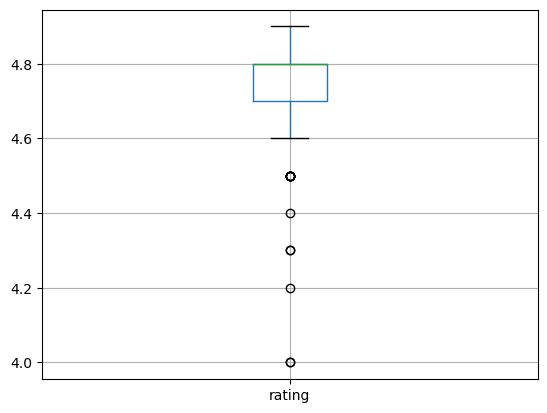

In [55]:
#Question9

from matplotlib import pyplot as plt

df.boxplot(column=['rating'])
plt.show()

In [52]:
#Question10

avg_ratings = df.groupby('institution')['rating'].mean().reset_index()
top5_institutes = avg_ratings.sort_values(by = 'rating', ascending = False).head(5)

print(top5_institutes)

                  institution  rating
24      Politecnico di Milano   4.900
34  Universidade de São Paulo   4.900
33   Universidad de los Andes   4.900
32        Universidad Austral   4.900
28        Stanford University   4.875


In [50]:
#Question11

courses = df.groupby('institution')['category-subject-area'].count().reset_index()
top5_institutes = courses.sort_values(by = 'category-subject-area', ascending = False).head(5)

print(top5_institutes)

                      institution  category-subject-area
10                         Google                     40
13             IBM Skills Network                     16
11                   Google Cloud                     16
44  University of Colorado System                      9
18           Macquarie University                      9


In [62]:
p_table = df.pivot_table(index='institution', columns='level', values='category-subject-area', aggfunc='count', fill_value=None)
advanced = p_table['Advanced Level'].idxmax()
intermediate = p_table['Intermediate Level'].idxmax()
beginner = p_table['Beginner Level'].idxmax()

print(advanced)
print(intermediate)
print(beginner)

University of Colorado Boulder
Google Cloud
Google


THIS IS AN INDIVIDUAL ASSIGNMENT. YOU MAY NOT DISCUSS THIS ASSIGNMENT WITH ANYONE WITHIN OR OUTSIDE THE CLASS (except the instructor).
- DO not discuss your approaches or your code with colleagues. There are many ways to implement this assignment, and it is extremely easy to spot code that has been inspired by someone else’s code and to identify unauthorized collaborations.
- If you choose to utilize something you find online, cite that resource, but DO NOT share that resource with anyone else.
By submitting this assignment, you certify that no unauthorized assistance has been received or given in the completion of this work.

Ukari Overby